In [2]:
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
import xgboost
from imblearn.over_sampling import RandomOverSampler

In [4]:
inputpath = "D:\\DataScience\\CyberSecurity\\Input\\"
traindata = pd.read_csv(inputpath + "new_train_sample.csv")

In [6]:


#inputpath = "D:\\DataScience\\CyberSecurity\\Input\\"
#traindata = pd.read_csv(inputpath + "GUIDE_Train.csv")

#checking null values
traindata.isnull().sum()

# cehcking null percentage
perc = traindata.isnull().mean()* 100
pd.DataFrame({
    'column_name': perc.index,
    "null_perc": perc.values,
    "null_count": traindata.isnull().sum().values
})

# droping 9 columns which have 90% of misisng values
drop_col = ["ActionGrouped", "ActionGranular", "EmailClusterId", "ThreatFamily", "ResourceType", "Roles", "AntispamDirection",
            "SuspicionLevel", "LastVerdict"]
traindata.drop(drop_col, axis=1, inplace= True)

# 50% of the data is missing for MitreTechniques columns so performing mode imputation

mode_gen = traindata['MitreTechniques'].mode()[0]
traindata['MitreTechniques'].fillna(mode_gen, inplace= True)

# 5% of the data is missing for IncidentGrade column so so performing mode imputation
incmode_gen = traindata['IncidentGrade'].mode()[0]
traindata['IncidentGrade'].fillna(incmode_gen, inplace= True)

C:\Users\Hedavguhan\AppData\Local\Temp\ipykernel_3616\4259826502.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traindata['MitreTechniques'].fillna(mode_gen, inplace= True)
C:\Users\Hedavguhan\AppData\Local\Temp\ipykernel_3616\4259826502.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [8]:
# Change Date format for Open Date column in StoresData
traindata['Timestamp'] = pd.to_datetime(traindata['Timestamp'])
traindata['Timestamp'] = traindata['Timestamp'].dt.strftime('%Y/%m/%d %H:%M:%S')
traindata['Timestamp']= pd.to_datetime( traindata['Timestamp'])
traindata['hour'] = traindata['Timestamp'].dt.hour
traindata['day_of_week'] = traindata['Timestamp'].dt.day_name()
traindata['Timestamp'] = traindata['Timestamp'].dt.strftime('%Y/%m/%d')

In [10]:
le = LabelEncoder() 
# Bulk Transform
for i in traindata.select_dtypes(include='object').columns:
    traindata[i] = le.fit_transform(traindata[i])  

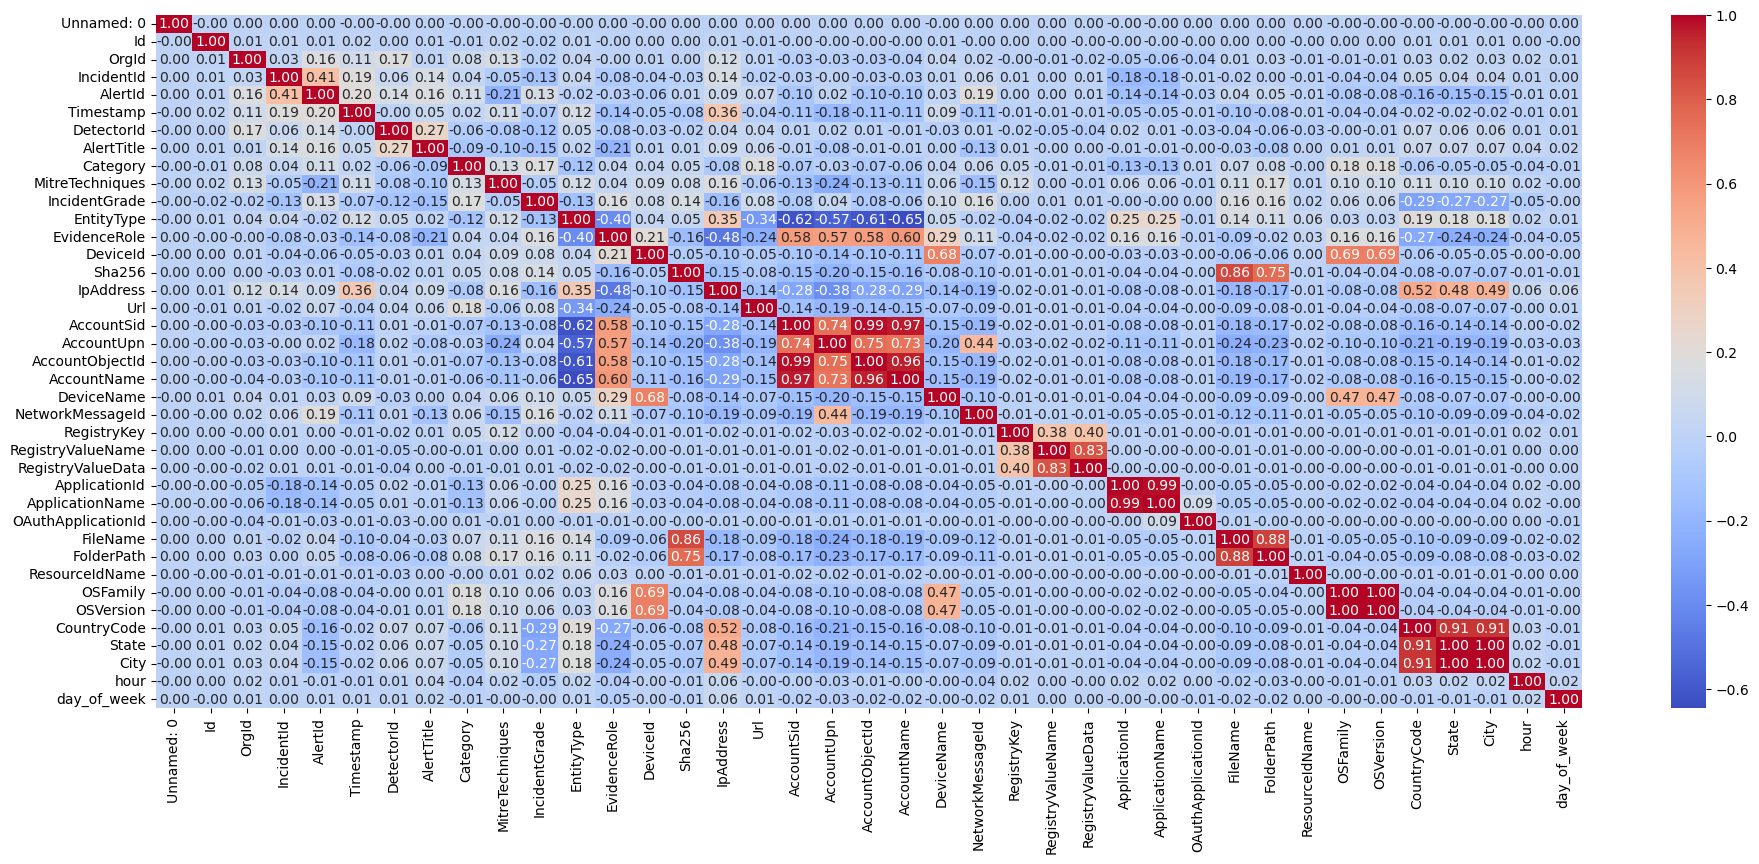

In [12]:
data_corr = traindata.corr()       # Correlation Coff metric


# Ploting Corr Heatmap
plt.figure(figsize = (23, 9))
sns.heatmap(data_corr, cmap='coolwarm', fmt='.2f', annot= True)
plt.show()

In [14]:
traindata.drop(['RegistryValueName',  'ApplicationName', 'FileName', 'OSFamily', 'State', 'AccountSid'], axis=1, inplace= True)

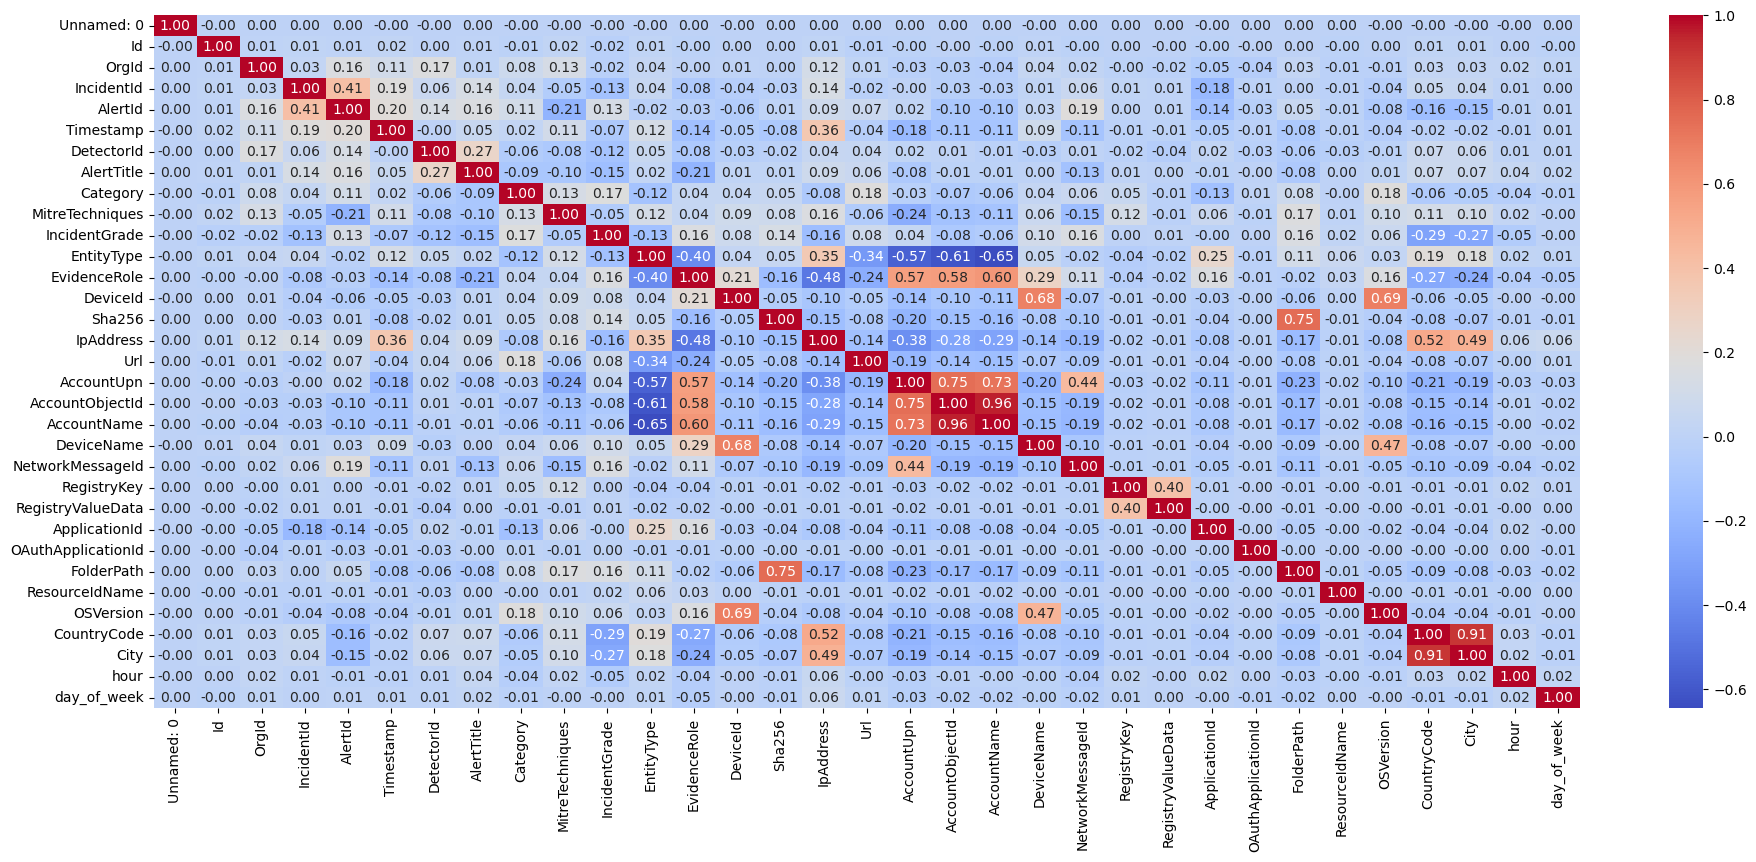

In [16]:
data_corr = traindata.corr()       # Correlation Coff metric


# Ploting Corr Heatmap
plt.figure(figsize = (23, 9))
sns.heatmap(data_corr, cmap='coolwarm', fmt='.2f', annot= True)
plt.show()

In [18]:
traindata.drop(['CountryCode',  'AccountUpn', 'AccountName', 'DeviceName', 'Sha256'], axis=1, inplace= True)

In [20]:
# Splitting data as training and testing 
val= traindata.drop('IncidentGrade', axis = 1)
tar = traindata['IncidentGrade']

In [22]:
os = RandomOverSampler(random_state= 45)
oval, otar = os.fit_resample(val, tar)

In [24]:
otar.value_counts()

IncidentGrade
0    2080549
2    2080549
1    2080549
Name: count, dtype: int64

In [26]:
fs = RandomForestClassifier(n_estimators= 2,random_state= 56)
fs.fit(oval, otar)

RandomForestClassifier(n_estimators=2, random_state=56)

In [28]:
pd.DataFrame({
    "Columns": oval.columns,
    "Score": fs.feature_importances_
}).sort_values('Score', ascending= False).head(15)["Columns"].to_list()

['OrgId',
 'IncidentId',
 'DetectorId',
 'AlertId',
 'AlertTitle',
 'Id',
 'Category',
 'Timestamp',
 'MitreTechniques',
 'hour',
 'AccountObjectId',
 'day_of_week',
 'EntityType',
 'Unnamed: 0',
 'NetworkMessageId']

In [32]:
oval = oval[['OrgId','IncidentId','DetectorId','AlertId','Id','Category','Timestamp','MitreTechniques','hour','AccountObjectId','day_of_week','EntityType',
'NetworkMessageId']]

In [40]:
oval = oval[['OrgId','IncidentId','DetectorId','AlertId','Id','Category','Timestamp','MitreTechniques']]

In [42]:
train_data, test_data, train_lab, test_lab = train_test_split(oval, otar, test_size= 0.20, random_state= 43)

In [44]:
val.shape

(4758418, 27)

In [46]:
oval.shape

(6241647, 8)

In [48]:
model = GradientBoostingClassifier(n_estimators= 350, learning_rate= 0.6, random_state= 55)
model.fit(train_data, train_lab)

KeyboardInterrupt: 

In [70]:
model = xgboost.XGBClassifier(n_estimators= 350, learning_rate= 0.9, random_state= 55)
model.fit(train_data, train_lab)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [72]:
tr_pred = model.predict(train_data)
ts_pred = model.predict(test_data)

In [48]:
def get_perform(actual, pred):
    acc = accuracy_score(actual, pred) * 100
    prec = precision_score(actual, pred, pos_label='none',
                           average='micro') * 100
    rec = recall_score (actual, pred, pos_label='none',
                           average='micro') * 100
    f1 = f1_score(actual, pred, pos_label='none',
                           average='micro') * 100
    return pd.DataFrame({
        "accuracy": [acc],
        "precision": [prec],
        "recall": [rec],
        "F1 score" : [f1]
    })

In [74]:
get_perform(train_lab, tr_pred)

C:\Users\Hedavguhan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'none') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Hedavguhan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'none') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Hedavguhan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'none') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy  precision     recall   F1 score
0  63.711136  63.711136  63.711136  63.711136

In [76]:
get_perform(test_lab, ts_pred)

C:\Users\Hedavguhan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'none') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Hedavguhan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'none') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Hedavguhan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'none') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy  precision    recall  F1 score
0  63.11352   63.11352  63.11352  63.11352

In [ ]:
model = GradientBoostingClassifier(n_estimators= 350, learning_rate= 0.9, random_state= 55)
model.fit(train_data, train_lab)

In [78]:
#Randon forest classifier

fs = RandomForestClassifier(n_estimators= 300,random_state= 56)
fs.fit(oval, otar)

MemoryError: Unable to allocate 23.8 MiB for an array with shape (6241647,) and data type int32